In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import cv2
import glob
import tifffile as tiff
import matplotlib.pyplot as plt

In [2]:
image_list = []
code = []

for filename in glob.glob('L_LCA/*.tiff'):
    img = tiff.imread(filename)
    image_list.append(img)
    code.append(os.path.basename(filename).split('.tiff')[0])
    print(filename)
    

L_LCA\ADM001_Tmap_T15_L_LCA.tiff
L_LCA\ADM004_Tmap_T15_L_LCA.tiff
L_LCA\CTA002_Tmap_T15_L_LCA.tiff
L_LCA\CTA003_Tmap_T15_L_LCA.tiff
L_LCA\CTA004_Tmap_T15_L_LCA.tiff
L_LCA\ESP001_Tmap_T15_L_LCA.tiff
L_LCA\ESP002_Tmap_T15_L_LCA.tiff
L_LCA\ESP003_Tmap_T15_L_LCA.tiff
L_LCA\ESP006_Tmap_T15_L_LCA.tiff
L_LCA\ESP008_Tmap_T15_L_LCA.tiff
L_LCA\ESP009_Tmap_T15_L_LCA.tiff
L_LCA\ESP010_Tmap_T15_L_LCA.tiff
L_LCA\ESP011_Tmap_T15_L_LCA.tiff
L_LCA\EST004_Tmap_T15_L_LCA.tiff
L_LCA\EXT003_Tmap_T15_L_LCA.tiff
L_LCA\MED001_Tmap_T15_L_LCA.tiff
L_LCA\MED002_Tmap_T15_L_LCA.tiff
L_LCA\MED006_Tmap_T15_L_LCA.tiff
L_LCA\NRT001_Tmap_T15_L_LCA.tiff
L_LCA\NRT002_Tmap_T15_L_LCA.tiff
L_LCA\NRT003_Tmap_T15_L_LCA.tiff
L_LCA\NRT004_Tmap_T15_L_LCA.tiff


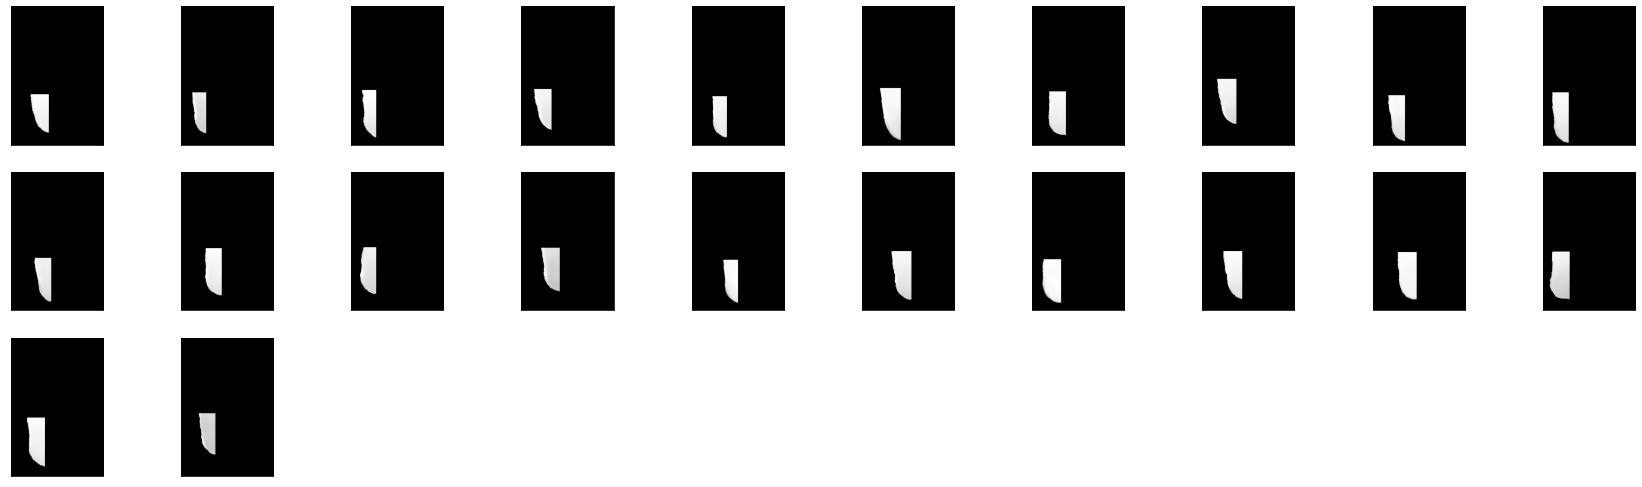

In [3]:
# Plot image for checking purposes
# Specify the overall grid size
plt.figure(figsize=(30,30)) 

for i in range(len(image_list)):
    # The number of images in the grid is 22 distributed in a 10 by 10 matrix
    plt.subplot(10,10,i+1)    
    plt.imshow(image_list[i], cmap=plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
# Extract mean value for each angiosome on each image
# Define list in which data will be stored
L_LCA_mean = []
L_LCA_std = []
L_LCA_max = []
L_LCA_min = []
L_LCA_skew = []
L_LCA_kurtosis = []
L_LCA_img = []

subject = []

for i in range(len(image_list)):
    # Save image as array
    img = np.asarray(image_list[i][image_list[i] > 0])
    L_LCA_img.append(img)
    # Mean value
    img_mean = np.mean(image_list[i][image_list[i] > 0])   
    L_LCA_mean.append(img_mean)
    # Standard deviation 
    img_std = np.std(image_list[i][image_list[i] > 0])   
    L_LCA_std.append(img_std)
    # Maximum value
    img_max = np.max(image_list[i][image_list[i] > 0])   
    L_LCA_max.append(img_max)
    # Minimum value
    img_min = np.min(image_list[i][image_list[i] > 0])   
    L_LCA_min.append(img_min)
    # Skew
    img_skew = skew(image_list[i][image_list[i] > 0])   
    L_LCA_skew.append(img_skew)
    # Kurtosis
    img_kurtosis = kurtosis(image_list[i][image_list[i] > 0])   
    L_LCA_kurtosis.append(img_kurtosis)
    # Subject
    subject.append(code[i])
    print(subject[i], L_LCA_mean[i], L_LCA_std[i], L_LCA_max[i], L_LCA_min[i], L_LCA_skew[i], L_LCA_kurtosis[i])   


ADM001_Tmap_T15_L_LCA 26.676754 3.950608 29.504353 0.07650252 -4.559691545269003 23.204316747486825
ADM004_Tmap_T15_L_LCA 19.787466 3.0923693 25.175667 0.10649239 -3.300398469273261 15.626029802928016
CTA002_Tmap_T15_L_LCA 23.332928 3.8431404 26.508564 0.13560343 -3.5514696452195404 15.382061406849267
CTA003_Tmap_T15_L_LCA 23.377094 3.3373902 27.40295 0.11072725 -4.586080510355956 24.446606792573018
CTA004_Tmap_T15_L_LCA 21.562662 3.0411594 24.776953 0.35279965 -4.344352530542979 22.308895618652905
ESP001_Tmap_T15_L_LCA 25.406918 3.5782614 28.759224 0.0758083 -3.8943119286208856 19.696593127661874
ESP002_Tmap_T15_L_LCA 24.768692 3.4167728 28.786068 0.25602633 -4.216552670360159 22.424391646347217
ESP003_Tmap_T15_L_LCA 26.881472 3.6120436 31.685932 0.1252363 -4.379501364615519 23.803055604699434
ESP006_Tmap_T15_L_LCA 23.962517 3.7086577 27.589346 0.040356994 -3.7051823283682763 17.329153102017727
ESP008_Tmap_T15_L_LCA 25.390013 3.7876625 29.661936 0.041514024 -3.7007959866384965 17.7715

In [5]:
# Initialize data of lists
data = {'Subject': subject,
        'L_LCA_mean': L_LCA_mean, 
        'L_LCA_std': L_LCA_std,
        'L_LCA_max': L_LCA_max,
        'L_LCA_min': L_LCA_min,
        'L_LCA_skew': L_LCA_skew,
        'L_LCA_kurtosis': L_LCA_kurtosis}
  
# Create DataFrame
df = pd.DataFrame(data)
display(df)

df.to_csv('L_LCA.csv', index=False) 

,Subject,L_LCA_mean,L_LCA_std,L_LCA_max,L_LCA_min,L_LCA_skew,L_LCA_kurtosis
0,ADM001_Tmap_T15_L_LCA,26.676754,3.950608,29.504353,0.076503,-4.559692,23.204317
1,ADM004_Tmap_T15_L_LCA,19.787466,3.092369,25.175667,0.106492,-3.300398,15.626030
2,CTA002_Tmap_T15_L_LCA,23.332928,3.843140,26.508564,0.135603,-3.551470,15.382061
3,CTA003_Tmap_T15_L_LCA,23.377094,3.337390,27.402950,0.110727,-4.586081,24.446607
4,CTA004_Tmap_T15_L_LCA,21.562662,3.041159,24.776953,0.352800,-4.344353,22.308896
5,ESP001_Tmap_T15_L_LCA,25.406918,3.578261,28.759224,0.075808,-3.894312,19.696593
6,ESP002_Tmap_T15_L_LCA,24.768692,3.416773,28.786068,0.256026,-4.216553,22.424392
7,ESP003_Tmap_T15_L_LCA,26.881472,3.612044,31.685932,0.125236,-4.379501,23.803056
8,ESP006_Tmap_T15_L_LCA,23.962517,3.708658,27.589346,0.040357,-3.705182,17.329153
9,ESP008_Tmap_T15_L_LCA,25.390013,3.787663,29.661936,0.041514,-3.700796,17.771585


In [6]:
# Total values for this angiosome
# Concatenate all data for extracting parameters
L_LCA_all = np.concatenate((L_LCA_img[0],L_LCA_img[1],L_LCA_img[2],L_LCA_img[3],L_LCA_img[4],L_LCA_img[5],
                            L_LCA_img[6],L_LCA_img[7],L_LCA_img[8],L_LCA_img[9],L_LCA_img[10],L_LCA_img[11],
                            L_LCA_img[12],L_LCA_img[13],L_LCA_img[14],L_LCA_img[15],L_LCA_img[16],L_LCA_img[17],
                            L_LCA_img[18],L_LCA_img[19],L_LCA_img[20],L_LCA_img[21]))
L_LCA_all_mean = np.mean(L_LCA_all)
L_LCA_all_std = np.std(L_LCA_all)
L_LCA_all_max = np.max(L_LCA_all)
L_LCA_all_min = np.min(L_LCA_all)
L_LCA_all_skew = skew(L_LCA_all)
L_LCA_all_kurtosis = kurtosis(L_LCA_all)

# Initialize data of lists
data2 = {'Variables':['L_LCA_all_mean', 'L_LCA_all_std', 'L_LCA_all_max', 'L_LCA_all_min', 'L_LCA_all_skew', 
                      'L_LCA_all_kurtosis'],
         'Values': [L_LCA_all_mean, L_LCA_all_std, L_LCA_all_max, L_LCA_all_min, L_LCA_all_skew, L_LCA_all_kurtosis]}
  
# Create DataFrame
df2 = pd.DataFrame(data2)
display(df2)

df2.to_csv('L_LCA_all.csv', index=False) 


,Variables,Values
0,L_LCA_all_mean,24.393036
1,L_LCA_all_std,4.008323
2,L_LCA_all_max,31.685932
3,L_LCA_all_min,0.040357
4,L_LCA_all_skew,-2.720373
5,L_LCA_all_kurtosis,11.384076


In [9]:
a_file = open("L_LCA.txt", "w")
np.savetxt(a_file, L_LCA_all)
a_file.close()